# Домашнее задание 1. Дискретно-событийное моделирование

Задача 2 (Золотарев Антон, З - 9-я буква алфавита, 9%4=1, 1+1=2)

На некоторую базу в среднем через 30 мин прибывают автомашины с продукцией. Среднее время разгрузки одной машины составляет 1,5 часа. Разгрузку производят две бригады грузчиков. На территории базы могут находиться в очереди в ожидании разгрузки не более 4 автомашин. Определить показатели работы СМО.

Теоретические значения - почти все расчёты случайно потёр, когда сверял с эмпирическими наблюдениями :(((

* Интенсивность нагрузки канала = $\rho=\frac{\lambda}{\mu}=\frac{2}{2/3}=3$

1. Показатели эффективности использования СМО
  1. Абсолютная пропускная способность СМО = $\textbf{1.28012}$
  2. Относительная пропускная способность СМО = $\textbf{0.64006}$
  3. Средняя продолжительность периода занятости СМО = $\textbf{31.16561}$
  4. Коэффициент использования СМО = $\textbf{0.98421}$
2. Показатели качества обслуживания заявок:
  1. Среднее время ожидания заявки в очереди = $\textbf{1.2923}$
  2. Среднее время пребывания заявки в СМО = $\frac{L_{оч} + A/\mu}{\lambda} = 1.2923+\frac{1.28012*3}{4}=\textbf{2.25239}$
  3. Вероятность отказа = $\textbf{0.35994}$
  4. Вероятность того, что вновь поступившая заявка немедленно будет принята к обслуживанию= $\textbf{0.06316}$
  5. Закон распределения времени ожидания заявки в очереди -
  $P\{0\}=p_0+p_1=0.06316$
  $F_W(t)=1-\sum\limits_{n=c}^{K-1}\pi_n\sum\limits_{i=0}^{n-c}\frac{(c\mu t)^i e^{-c\mu t}}{i!}=
  1-\sum\limits_{n=2}^{6}\pi_n\sum\limits_{i=0}^{n-2}\frac{(4/3 t)^i e^{-4/3 t}}{i!}$

  6. Закон распределения времени пребывания заявки в СМО =
  7. Среднее число заявок, находящихся в очереди = $2.5846$
  8. Среднее число заявок, находящихся в СМО = $\textbf{4.50478}$

  Черновик:
  
  $p_0=\frac{1}{1+3+4.5+\frac{27\cdot4.0625}{2}}=0.01579$

In [ ]:
!pip install simpy
import simpy
import random
import statistics
import scipy as sc
import numpy as np
import matplotlib.pyplot as plt


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Теор распределения времени ожидания заявки в очереди и времени пребывания в СМО

$F_W(0)=p_0+p_1=0.06316$

$F_W(t)=
  1-\sum\limits_{n=2}^{5}\pi_n\sum\limits_{i=0}^{n-2}\frac{(4/3 t)^i e^{-4/3 t}}{i!}$ - из формулы распределения времени ожидания заявки в очереди в параграфе 2.9 основного учебника

$p_2 = \frac{\lambda^n p_0}{n!\mu^n}=\frac{2^2\cdot 0.01579}{2\cdot 4/9}=0.071055$

$p_3 = \frac{\lambda^n p_0}{c^{n-c}c!\mu^n}=\frac{2^3\cdot 0.01579}{2\cdot2\cdot 8/27}=0.10658$

$p_4 =\frac{81\cdot 0.01579}{4\cdot2}=0.15987$

$p_5 = \frac{243\cdot 0.01579}{8\cdot2}=0.23981$

*посчитал в уме, что вероятность всех 7 состояний в сумме 1, всё ок*

Теоретическое распределение времени пребывания в СМО

$\pi_2 = \frac{p_2}{1-p_6}=0.071055/0.64006=0.11101$

$\pi_3 = \frac{p_3}{1-p_6}=0.10658/0.64006=0.16652$

$\pi_4 = \frac{p_4}{1-p_6}=0.15987/0.64006=0.24977$

$\pi_5 = \frac{p_5}{1-p_6}=0.23981/0.64006=0.37465$

Теор распределение времени ожидания заявки в очереди

$F_W(t)=
  1-0.11101\cdot\left(e^{-4/3 t}\right)-
  0.16652\cdot\left(e^{-4/3 t}+(4/3 t) e^{-4/3 t}\right)-
  0.24977\cdot\left(e^{-4/3 t}+(4/3 t) e^{-4/3 t}+(4/3 t)^2 e^{-4/3 t}/2\right)
  -0.37465\cdot\left(e^{-4/3 t}+(4/3 t) e^{-4/3 t}+(4/3 t)^2 e^{-4/3 t}/2+(4/3 t)^3 e^{-4/3 t}/6\right)$

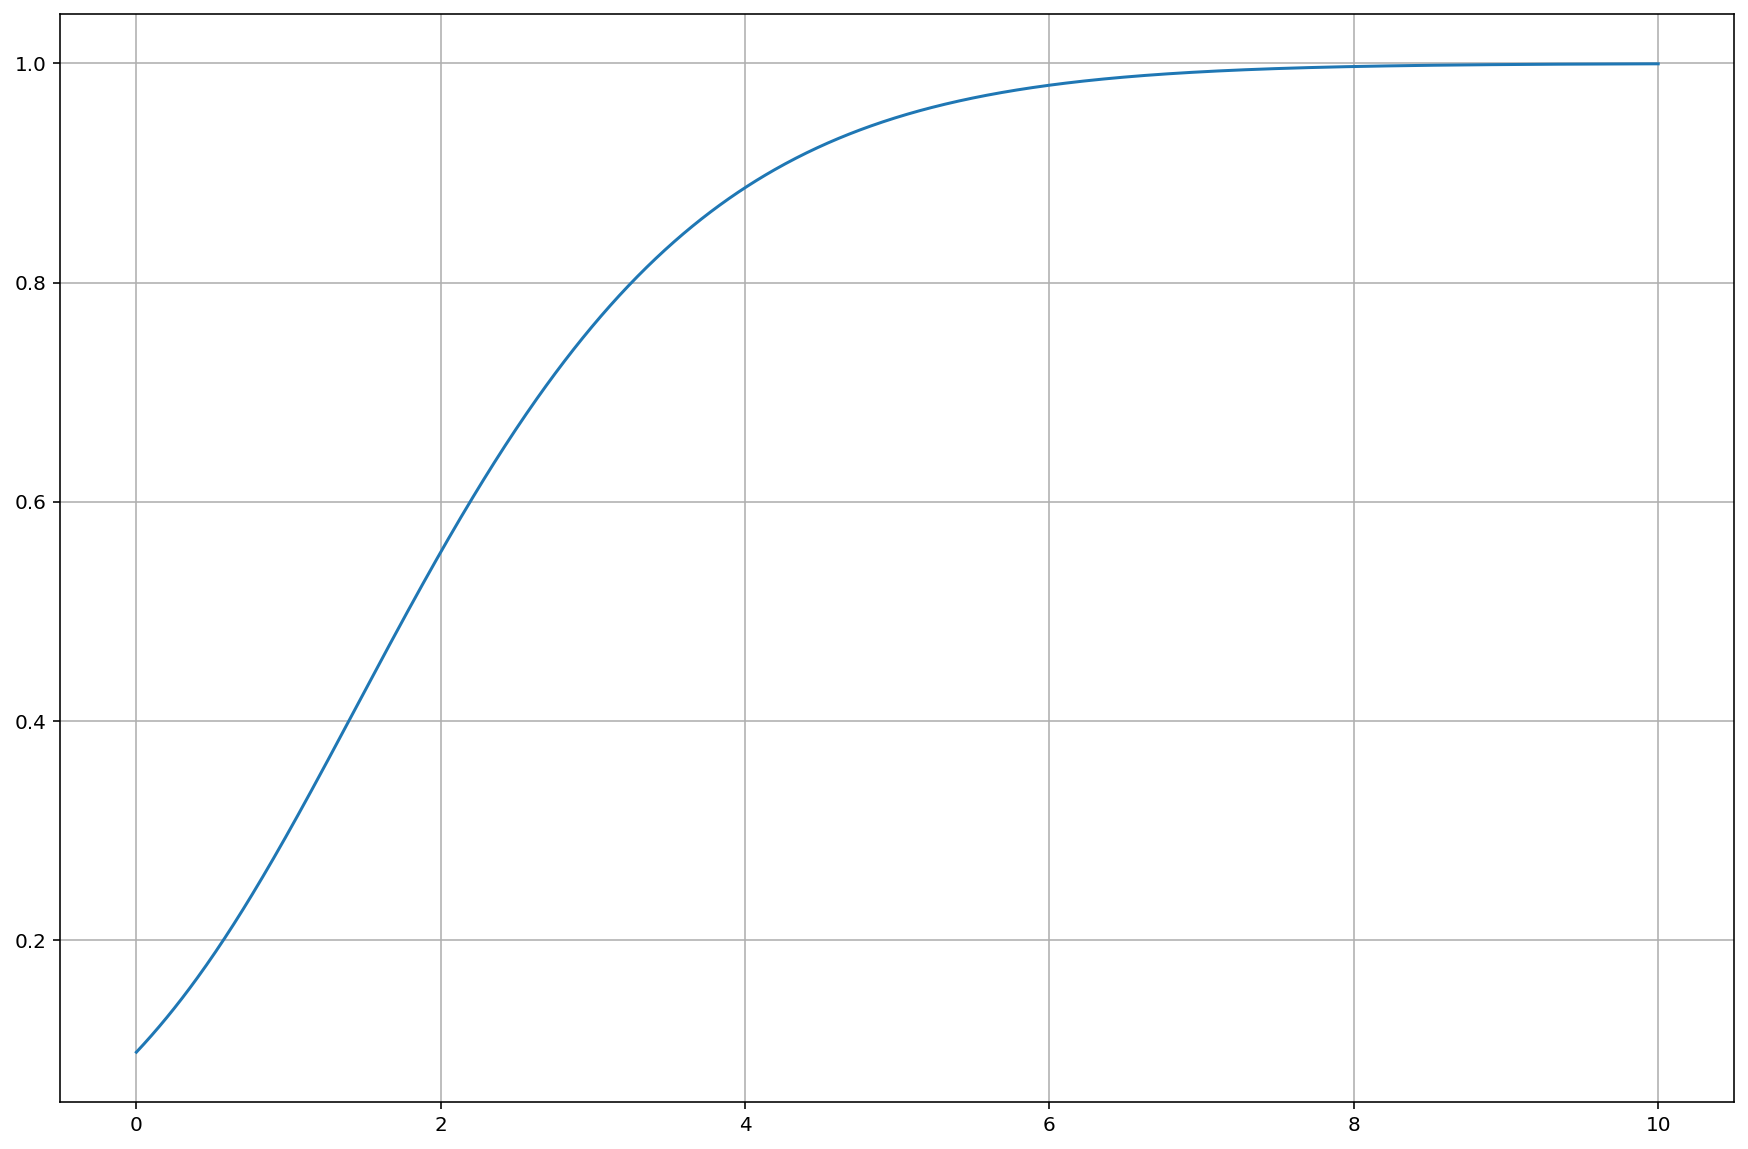

In [ ]:
plt.figure(figsize=(15, 10))
dt = 0.01
t = np.linspace(0, 10, int(10//dt)+1)
F_t = 1 - 0.11101*(np.exp(-4/3*t)) - 0.16652*(np.exp(-4/3*t)+4/3*t*np.exp(-4/3*t)) \
        - 0.24977*(np.exp(-4/3*t)+(4/3*t)**1*np.exp(-4/3*t) +(4/3*t)**2*np.exp(-4/3*t)/2)\
        - 0.37465*(np.exp(-4/3*t)+4/3*t*np.exp(-4/3*t) +(4/3*t)**2*np.exp(-4/3*t)/2 + (4/3*t)**3*np.exp(-4/3*t)/6)

plt.plot(t, F_t)
plt.grid()

# Система разгрузки автомашин

In [ ]:
class Unload_station:
    def __init__(self, env, n_brigades):
        self.env = env
        self.loader = simpy.Resource(env, n_brigades)

    def unload(self, machine, mu):
        yield self.env.timeout(np.random.exponential(scale=1 / mu))

## Описываем действия в системе

In [ ]:
def unload_machine(env, machine, unload_station, n_parking_lots, mu, total_spent_times, mean_total_spent_times_hist,
                queue_times, reject_applicatons, total_applications, prob_reject_hist, queue_time_hist, empty_station, ready_for_immediate_unload, p_zero_hist, p_immediate):
    # заявка (машина) приходит в систему (базу разгрузки)
    arrival_time = env.now
    if len(unload_station.loader.users) + len(unload_station.loader.queue) == 0: # проверяем, есть ли в системе заявки
                empty_station.append(machine)

    if len(unload_station.loader.users) + len(unload_station.loader.queue) < unload_station.loader.capacity : # проверяем, есть ли в системе заявки
                ready_for_immediate_unload.append(machine)

    with unload_station.loader.request() as request:
        if len(unload_station.loader.users) + len(unload_station.loader.queue) <= n_parking_lots + unload_station.loader.capacity: # выполняем проверку, уйдет ли заявка в отказ
            start_queue_time = env.now # момент попадания в очередь
            yield request
            queue_times.append(env.now - start_queue_time) # старт обслуживания, подсчет времени ожидания в очереди
            yield env.process(unload_station.unload(machine, mu))
        else:
            queue_times.append(0) # в случае переполненности время ожидания = 0
            unload_station.loader.release(request) # отказ
            reject_applicatons.append(machine)

    # машина покидает базу разгрузки -> считаем показатели СМО
    total_applications.append(machine) # количество заявок (пришедших машин)
    prob_reject_hist.append(len(reject_applicatons) / len(total_applications)) # доля отклонённых заявок
    p_zero_hist.append(len(empty_station) / len(total_applications)) # доля случаев, когда система пустует
    p_immediate.append(len(ready_for_immediate_unload) / len(total_applications)) # доля случаев, когда система готова мгновенно приступить к обработке заявки
    queue_time_hist.append(np.mean(queue_times)) # среднее время ожидания в очереди
    total_spent_times.append(env.now - arrival_time) # общее время, проведённое машиной в системе
    mean_total_spent_times_hist.append(np.mean(total_spent_times)) # среднее общее время, проведённое машиной в системе

### генерация приходящих заявок

In [ ]:
def run_station(env, n_brigades, n_parking_lots, mu, lambda_, total_spent_times, mean_total_spent_times_hist,
                   queue_times, reject_applicatons, total_applications, prob_reject_hist, queue_time_hist, empty_station, ready_for_immediate_unload, p_zero_hist, p_immediate):
    station = Unload_station(env, n_brigades)
    client = -1
    while True:
        yield env.timeout(np.random.exponential(scale=1 / lambda_))  # заявки приходят через эксп. распр. моменты
                                                                   # с параметром лямбда
        client += 1
        env.process(unload_machine(env, client, station, n_parking_lots, mu, total_spent_times, mean_total_spent_times_hist,
                                queue_times, reject_applicatons, total_applications, prob_reject_hist, queue_time_hist, empty_station, ready_for_immediate_unload, p_zero_hist, p_immediate))

## Пишем симуляции

In [ ]:
def simulate_experiment(iters=5):
    prob_rej_hist_lst, queue_time_hist_lst, mean_total_spent_times_hist_lst, p_zero_hist_lst, p_immediate_lst = [], [], [], [], []
    for _ in range(iters):
        random.seed(42) # фиксируем seed

        lambda_ = 2 # интенсивность входного потока
        mu = 2/3 # интенсивность обслуживания
        n = 2 # число мастеров (каналов)
        N = 4 # число мест в очереди
        total_spent_times = [] # время пребывания заявки в СМО
        mean_total_spent_times_hist = [] # история среднего времени пребывания заявки в СМО
        queue_times = [] # время пребывания заявки в очереди
        reject_applicatons = [] # число заявок с отказом (закидываем в этот список сами завки, берем его длину)
        total_applications = [] # общее число заявок
        prob_reject_hist = [] # история наблюдаемых значений вероятности отказа
        queue_time_hist = [] # история наблюдаемых значений среднего времени пребывания в очереди
        empty_station = [] # число заявок, заставших ноль заявок при попадании в СМО
        ready_for_immediate_unload = [] # число заявок, готовых к немедленной обработке
        p_zero_hist = [] # история наблюдаемых значений pi_0
        p_immediate = [] # история наблюдаемых значений pi_0+pi_1

        env = simpy.Environment() # симуляция
        proc = env.process(run_station(env, n, N, mu, lambda_,
                                          total_spent_times, mean_total_spent_times_hist,
                                          queue_times, reject_applicatons, total_applications, prob_reject_hist,
                                          queue_time_hist, empty_station, ready_for_immediate_unload, p_zero_hist, p_immediate))
        env.run(until=1000) # модельное время=1000 достаточно ввиду сходимости теоретических и эмпирических значений в результате графического анализа сходимости самих значений
        prob_rej_hist_lst.append(prob_reject_hist)
        queue_time_hist_lst.append(queue_time_hist)
        mean_total_spent_times_hist_lst.append(mean_total_spent_times_hist)
        p_zero_hist_lst.append(p_zero_hist)
        p_immediate_lst.append(p_immediate)
    return prob_rej_hist_lst, queue_time_hist_lst, mean_total_spent_times_hist_lst, p_zero_hist_lst, p_immediate_lst

In [ ]:
prob_rej_hist_lst, queue_time_hist_lst, mean_total_spent_times_hist_lst, p_zero_hist_lst, p_immediate_lst = simulate_experiment(100)

### функция отрисовки

In [ ]:
def plt_func(name, value, theor_value, gap_perc=0.05, ylim=False):
    gap = theor_value * gap_perc # считаем процентное отклонение от теоретического значения
    %config InlineBackend.figure_format = 'retina'
    fig, axs = plt.subplots(2,1, figsize=(15, 16))
    axs[0].set_ylabel(name)
    axs[1].set_ylabel('Разница')
    axs[0].set_xlabel('После k-ой обработанной заявки за 2000 часов')
    axs[0].set_title('{} для разных симуляций'.format(name))
    axs[1].set_title('Разница между теоретическим и наблюдаемым')
    axs[0].grid()
    axs[1].grid()
    if ylim:
        axs[0].set_ylim(0, ylim)
    for elem in value:
        axs[0].plot(elem)
        difer = np.abs(np.array(elem) - theor_value * np.ones(len(elem)))
        #axs[1].set_ylim(0, 0.05)
        axs[1].plot(difer)
    axs[0].axhline(y=theor_value, color='r', linestyle='--', label='Теоретическое значение')
    if gap:
        axs[0].axhline(y=theor_value + gap, color='r', linestyle='-')
        axs[0].axhline(y=theor_value - gap, color='r', linestyle='-')

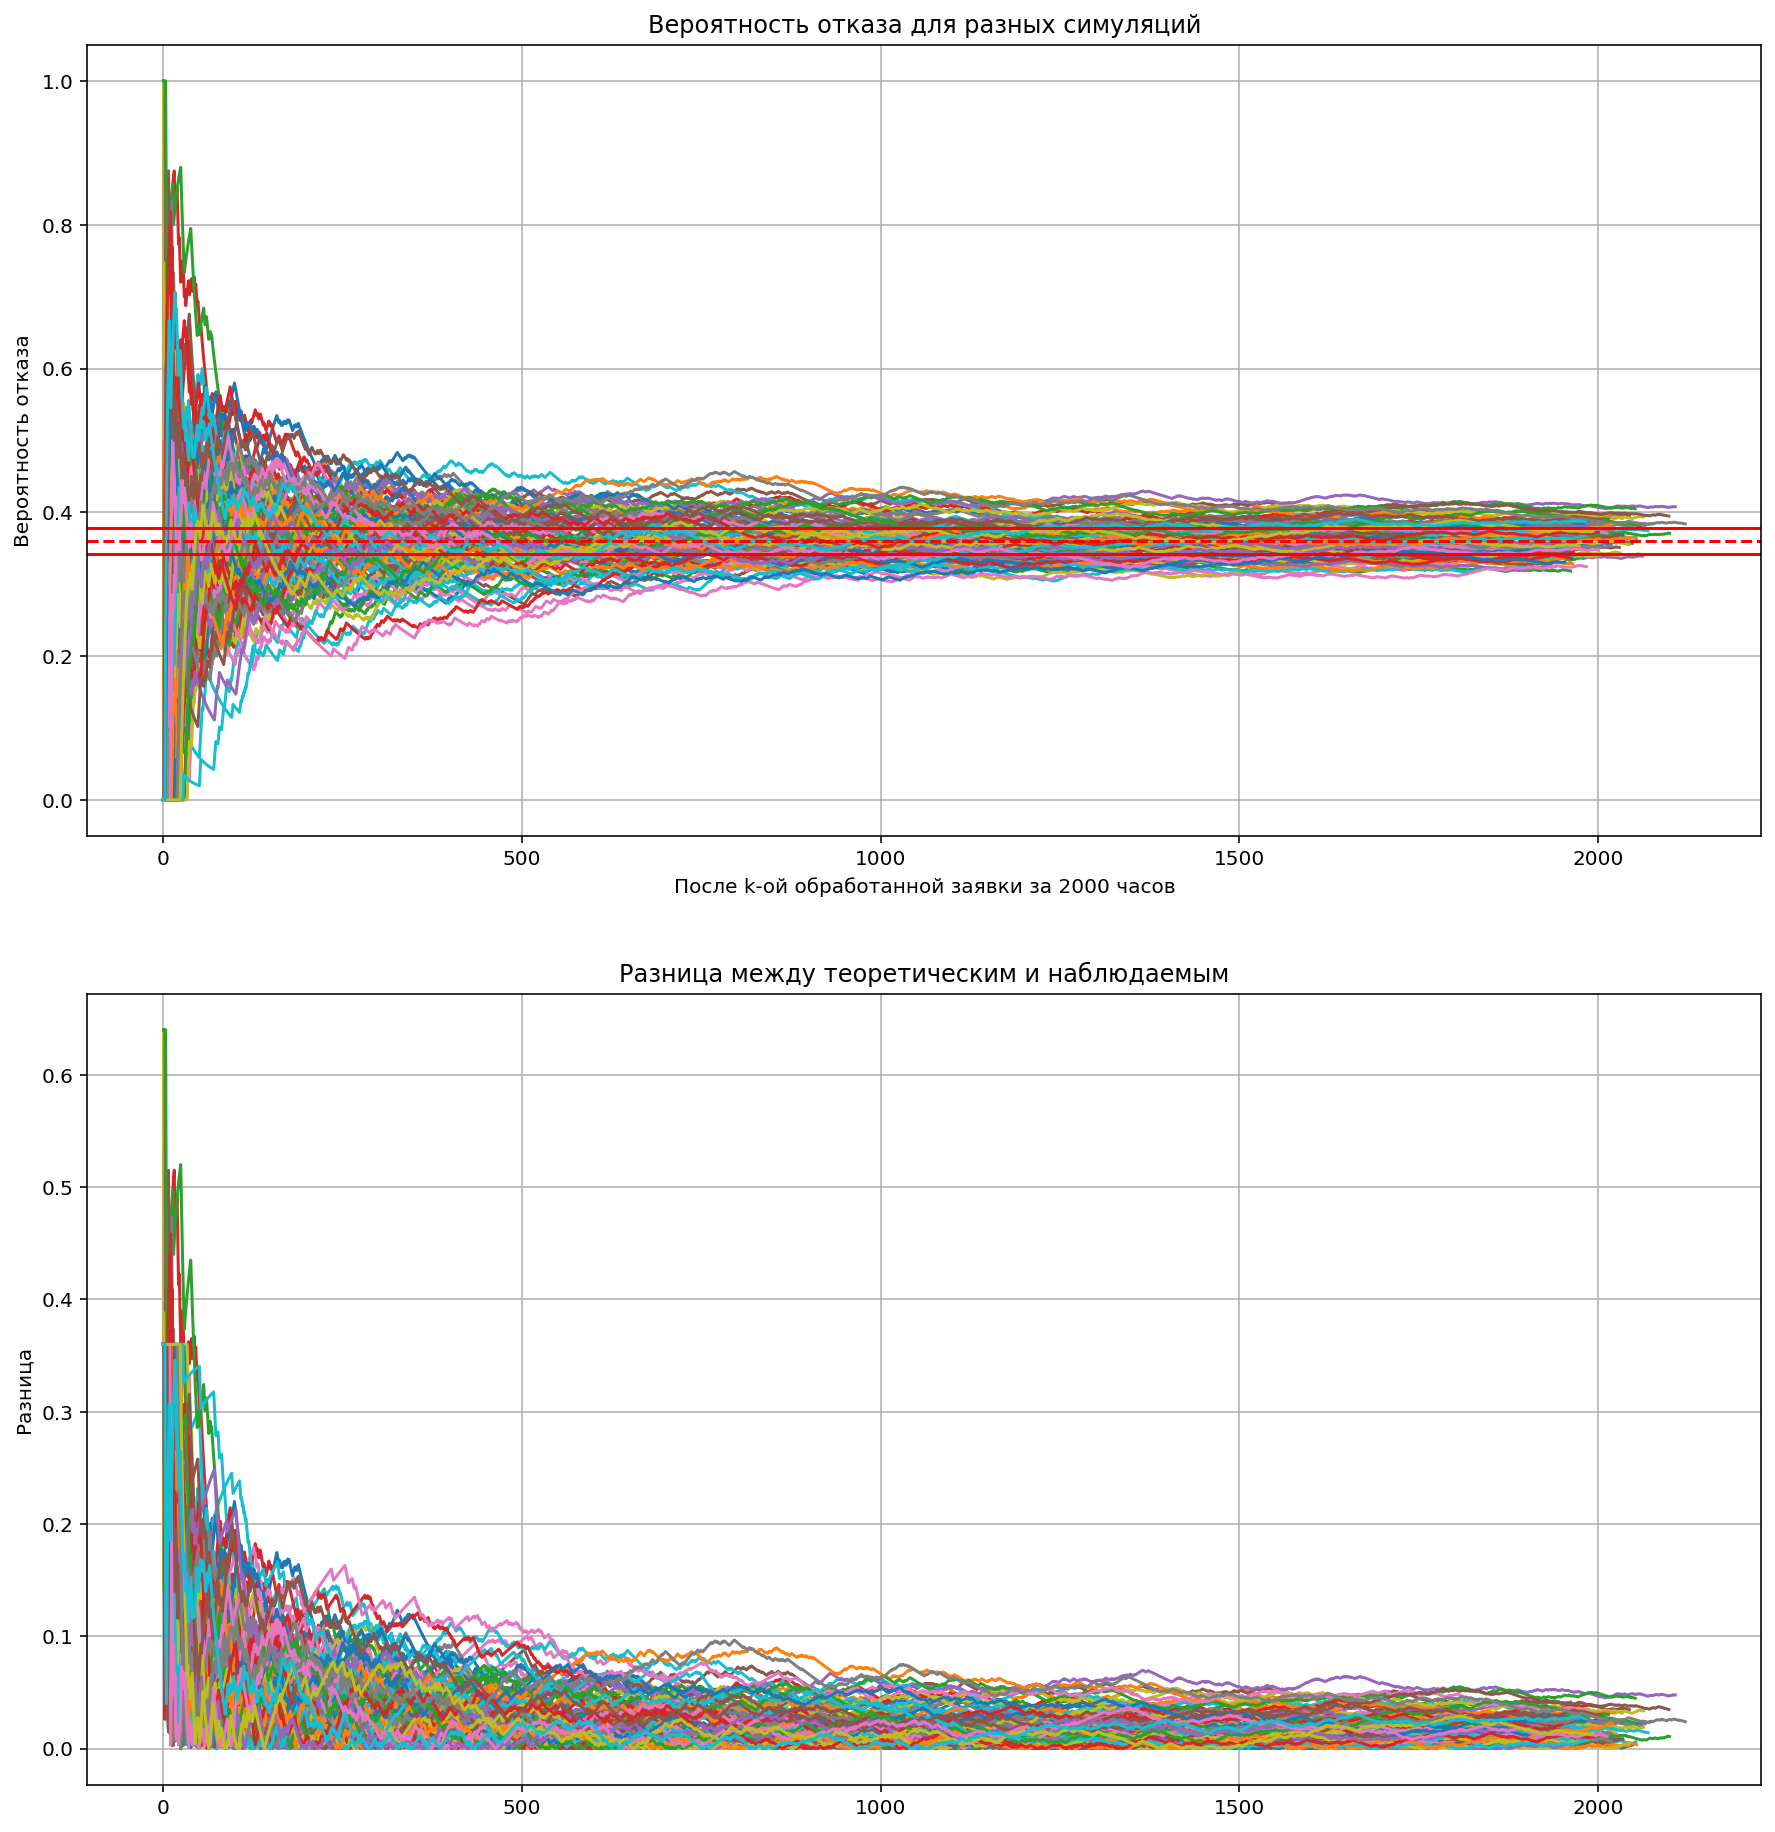

In [ ]:
plt_func('Вероятность отказа', prob_rej_hist_lst, 0.35994)

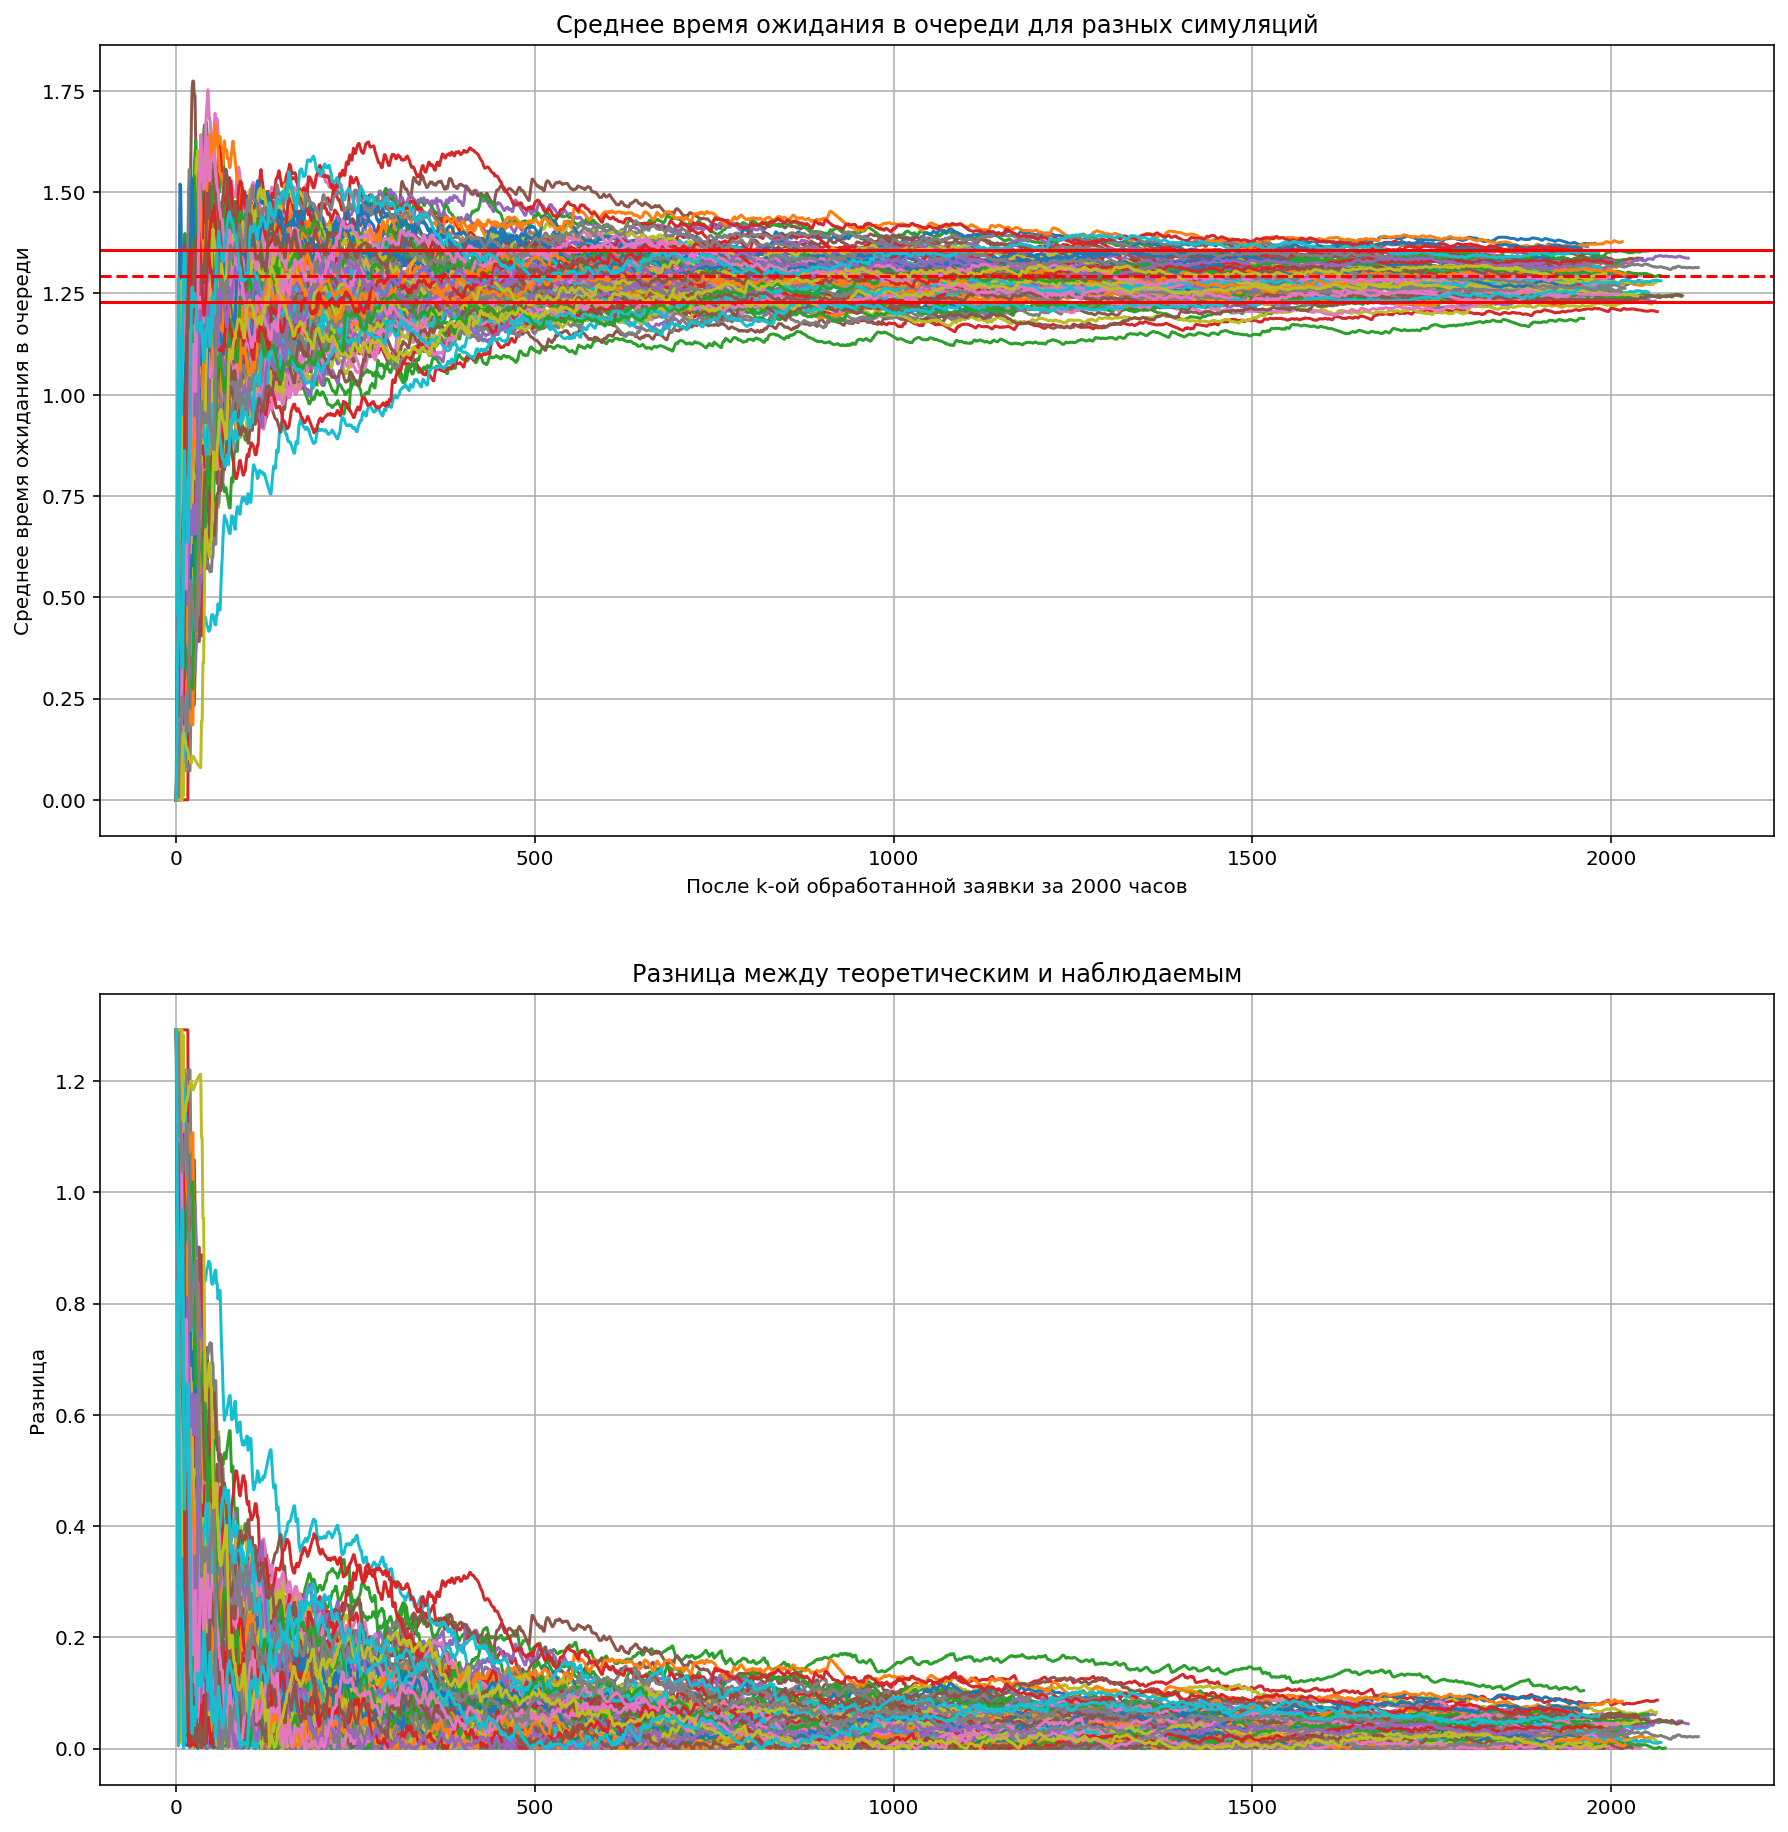

In [ ]:
plt_func('Среднее время ожидания в очереди', queue_time_hist_lst, 1.2923)

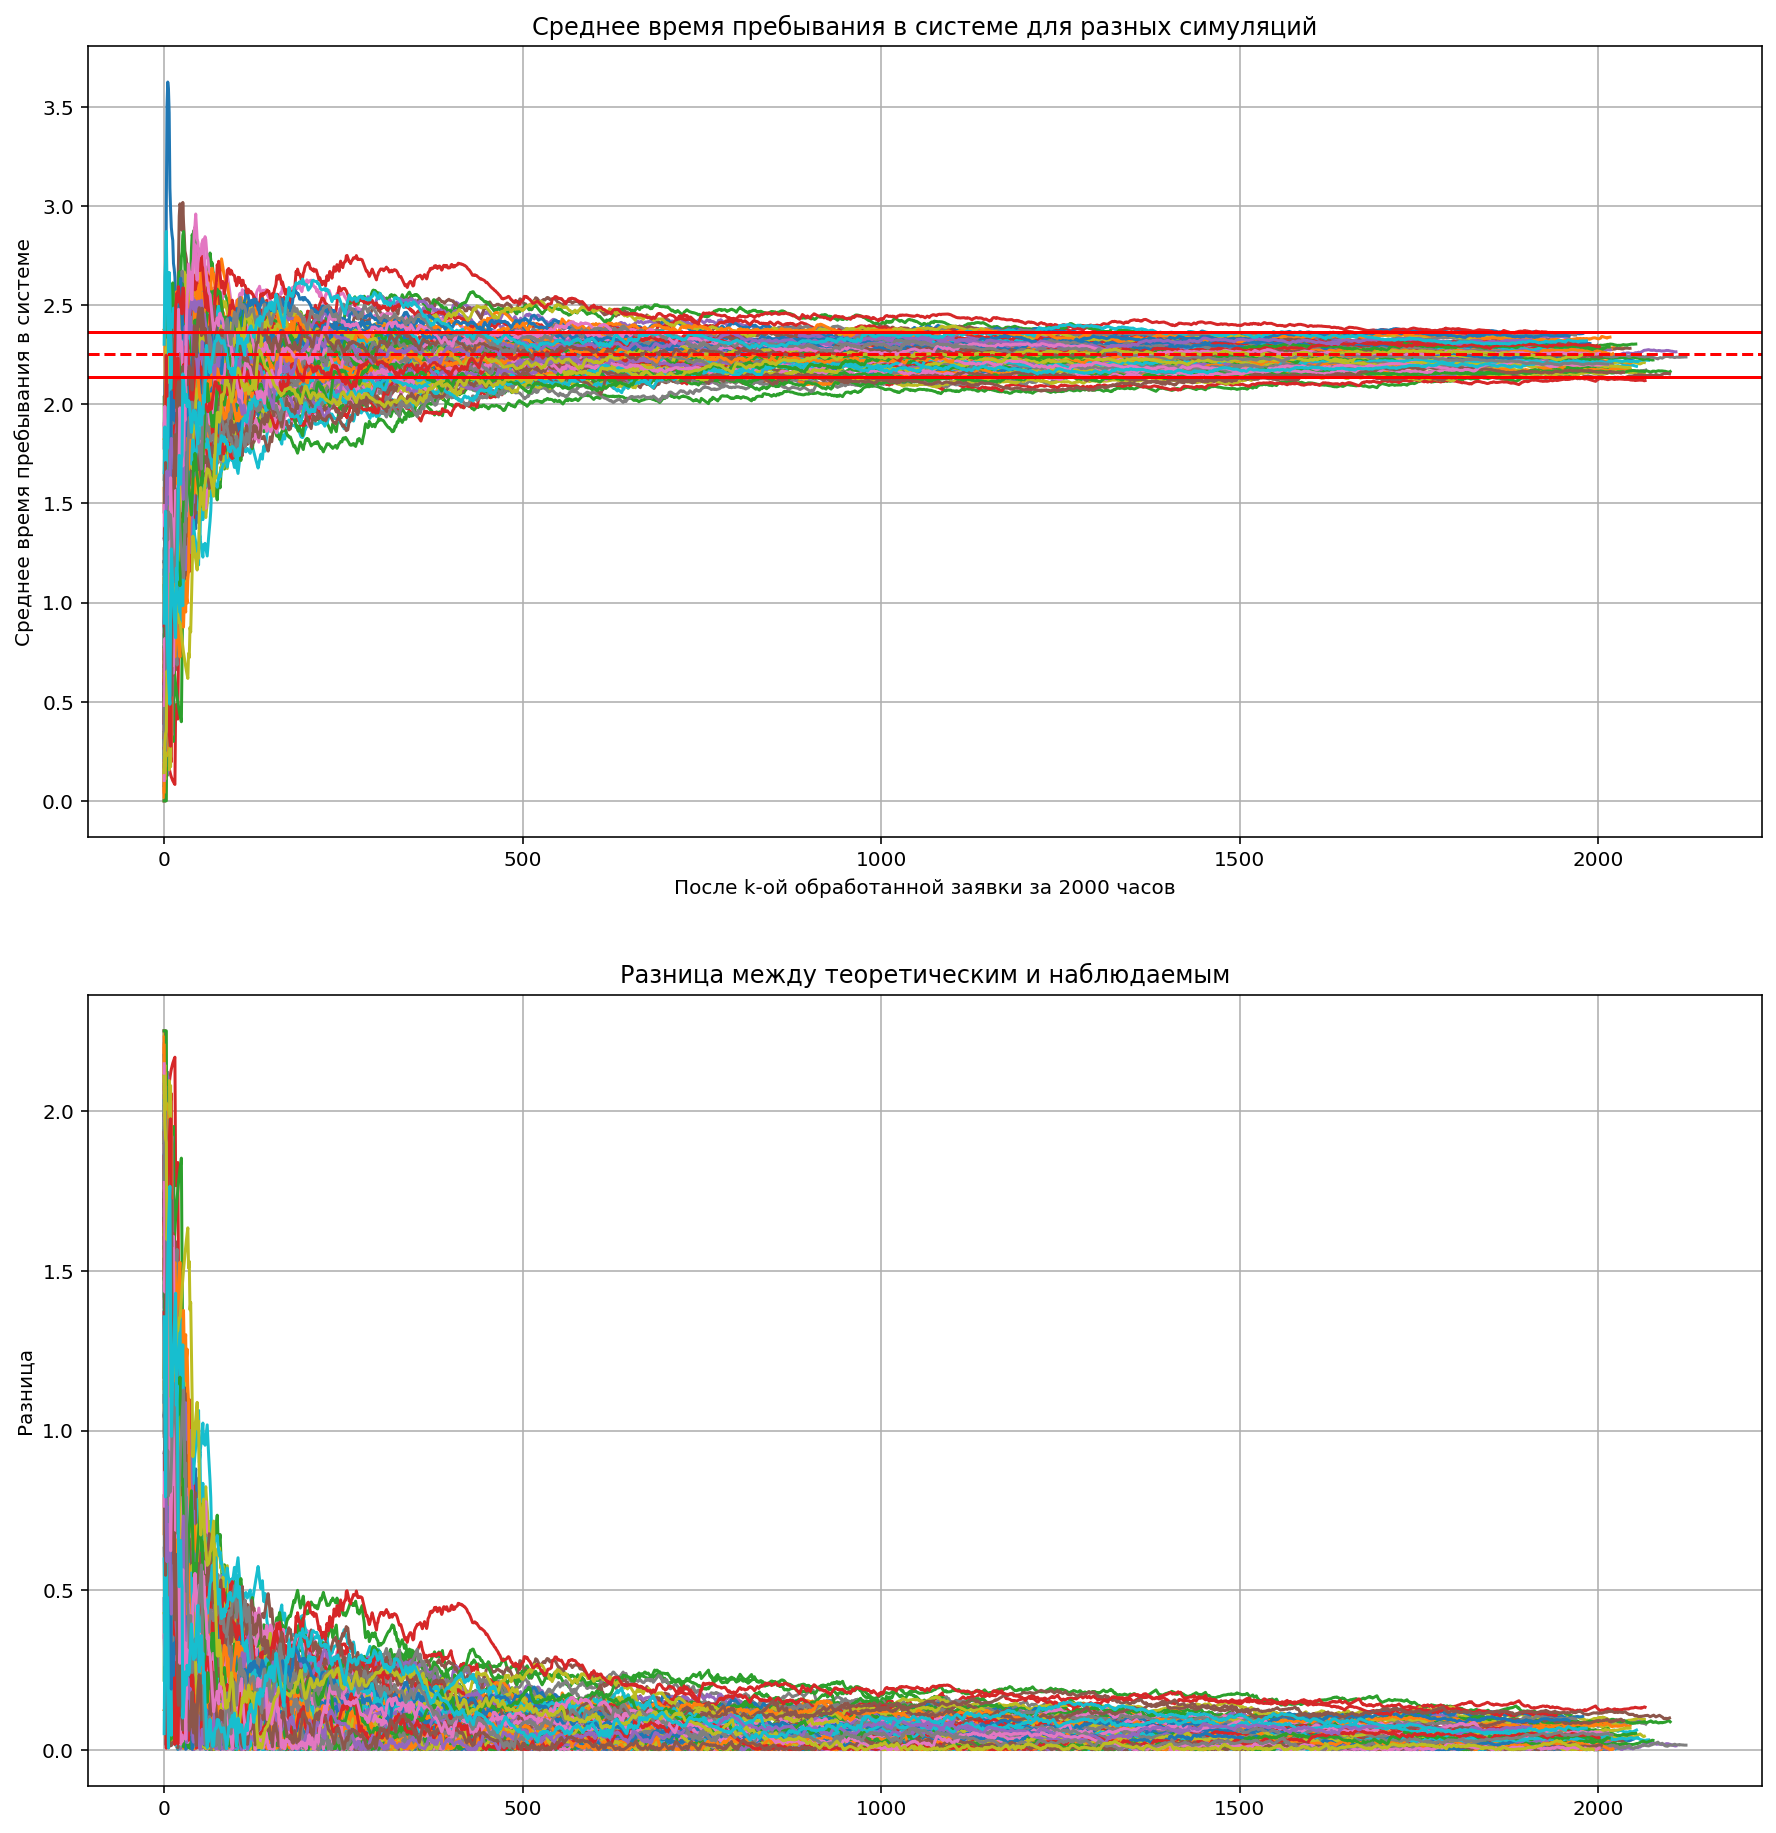

In [ ]:
plt_func('Среднее время пребывания в системе', mean_total_spent_times_hist_lst, 2.25239)

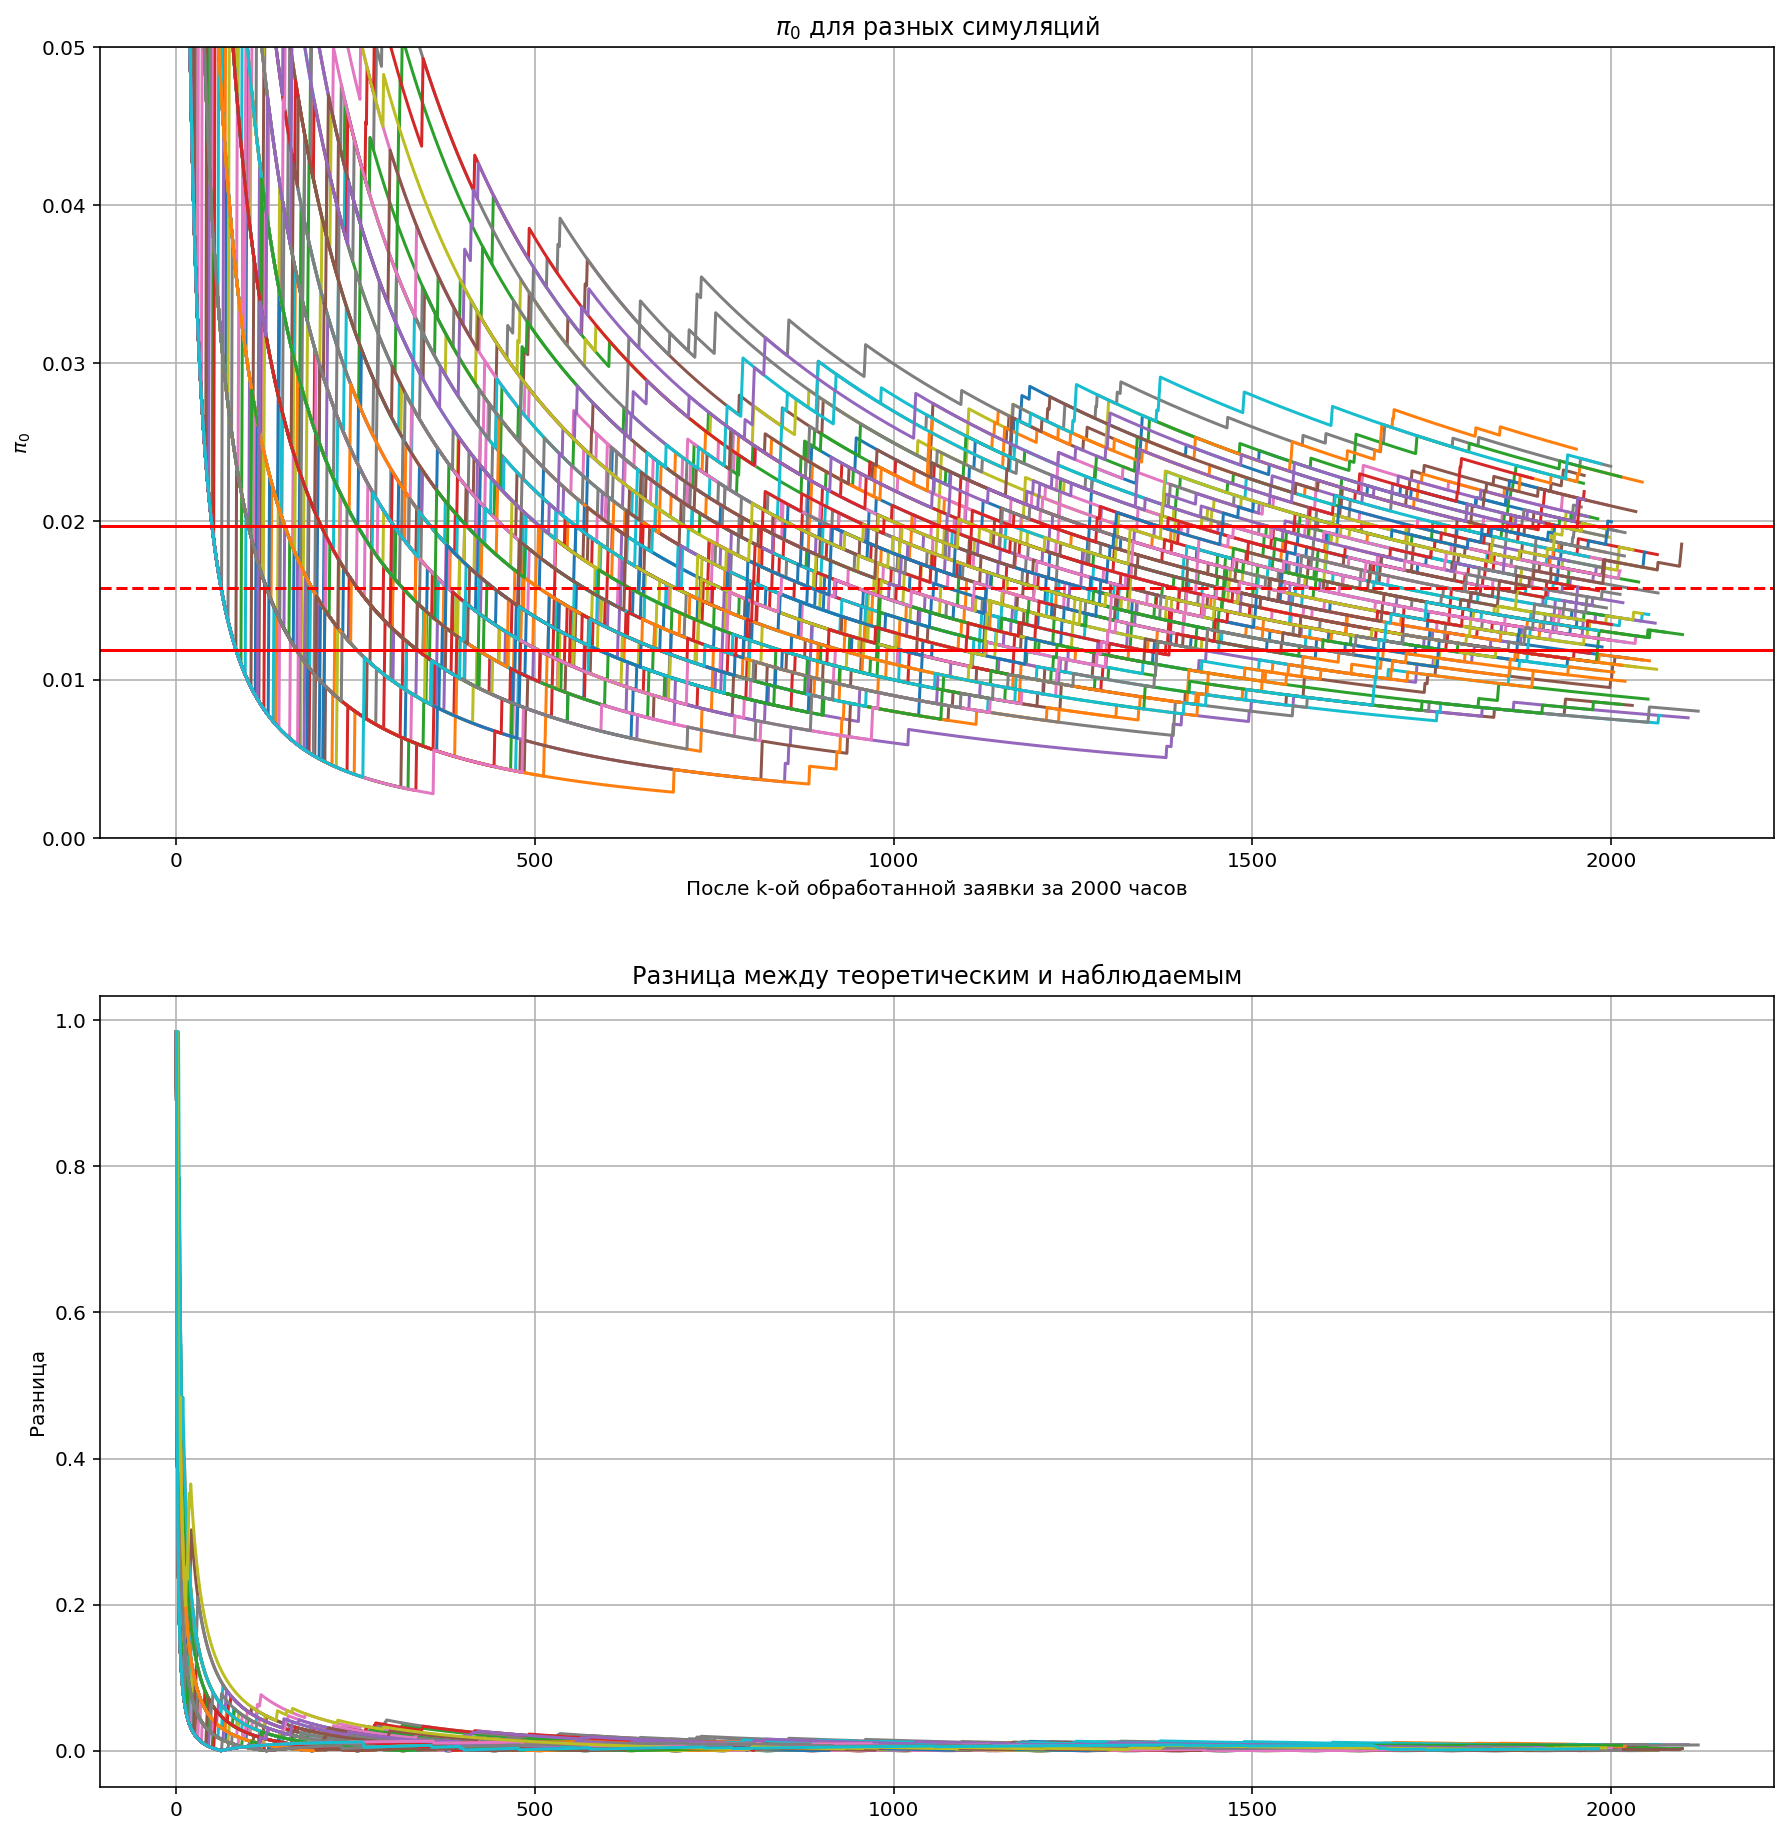

In [ ]:
plt_func('$\pi_0$', p_zero_hist_lst, 0.01579, 0.25, ylim=0.05)

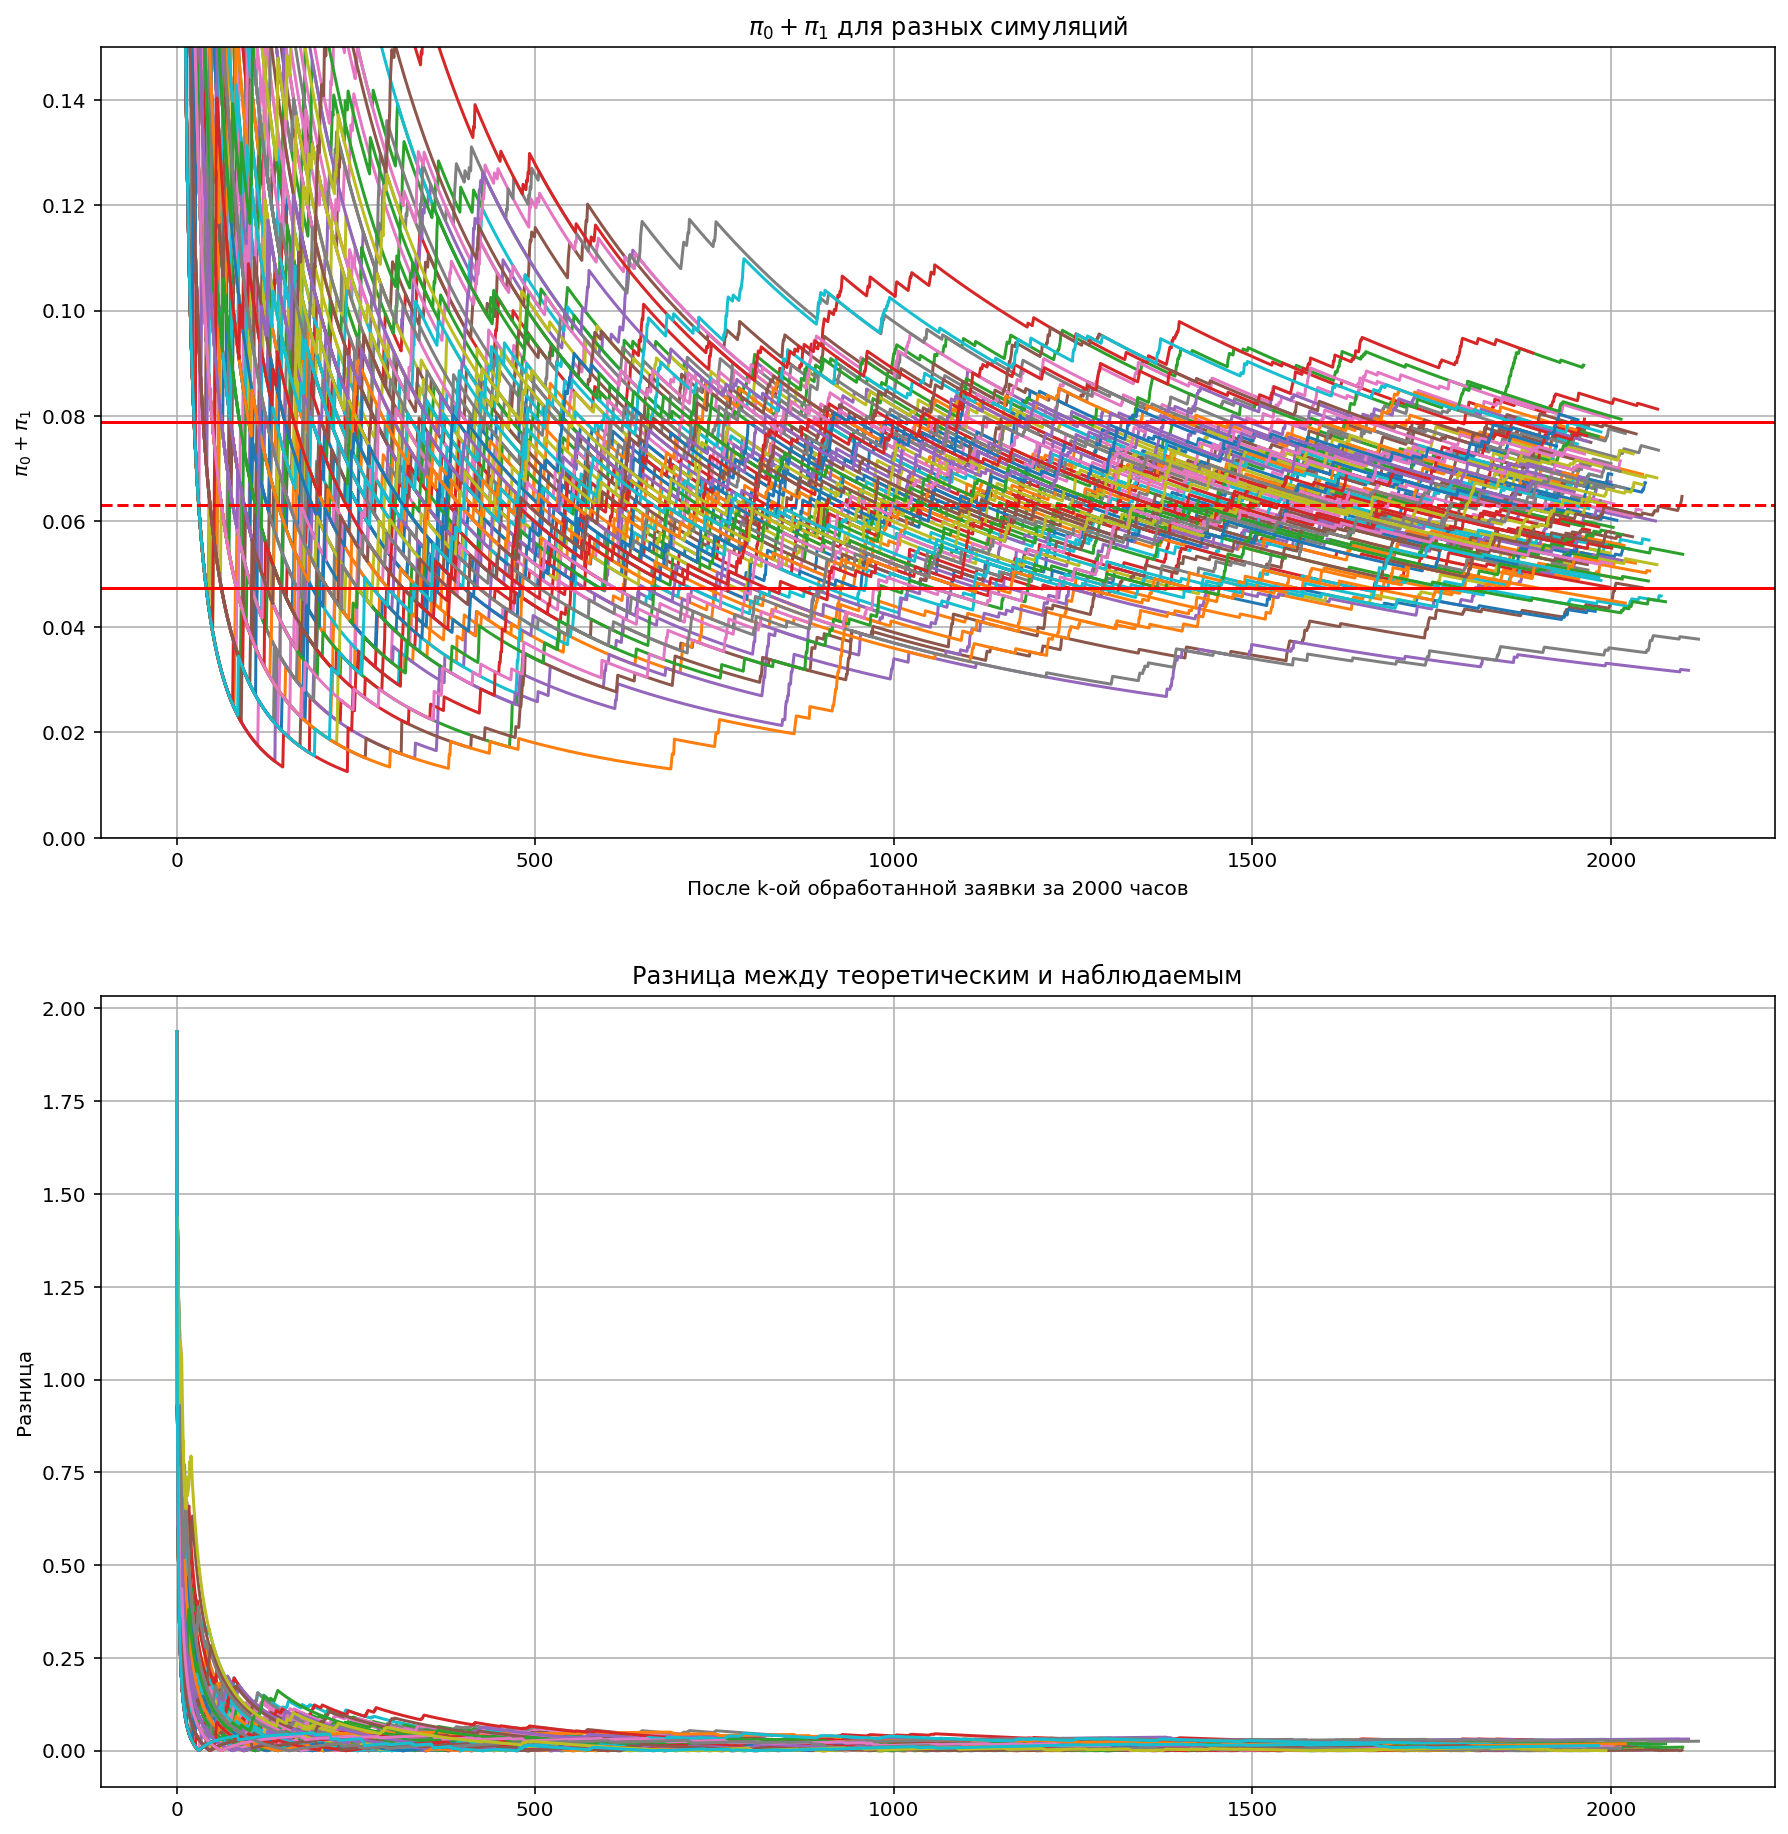

In [ ]:
plt_func('$\pi_0+\pi_1$', p_immediate_lst, 0.06316, 0.25, ylim=0.15) # считаем по приколу

**Из графиков видно, что, начиная с отметки примерно 1000-1500, наблюдаемые значения для показателей, можно сказать, входят в  "стационарный режим", колеблясь вблизи теоретического значения в пределах установленного окна (сплошные линии), поэтому можем говорить о том, что наблюдается сходимость**

Определим, проведено ли достаточное число экспериментов (стартов) по алгоритму, описанному в [статье](https://cyberleninka.ru/article/n/tochnyy-metod-rascheta-neobhodimogo-kolichestva-povtornyh-opytov/viewer)

In [ ]:
for i, x in enumerate([prob_rej_hist_lst, queue_time_hist_lst, mean_total_spent_times_hist_lst, p_zero_hist_lst, p_immediate_lst]):
    a = np.mean([x[i][-1] for i in range(len(x))])
    sigma = np.var([x[i][-1] for i in range(len(x))]) ** 0.5
    k_t = 0.05
    t_pr = k_t * a / sigma
    print(i + 1, ':', t_pr)

1 : 0.8783342011504752
2 : 1.66792237151859
3 : 2.191998414732229
4 : 0.19258619244999498
5 : 0.28351169925866215


Находим по таблице t-критерия Стьюдента ближайшее меньшее относительно расчетного табличное значение для доверительной вероятности 0.95 оно равно:
1. 0.836 (7 наблюдения)
2. 1.591 (3 наблюдения)
3. 2.4838 (2 наблюдения)
4. 0.1974 (100 наблюдений)
5. 0.2872 (48 наблюдений)

Провели 100 экспериментов и норм.

На основе этих (вероятность отказа, среднее время пребывания в очереди, $\pi_0$) показателей получаем оставшиеся показатели, используя формулы из теории, поскольку теоретически доказано, что этих 3 показателей достаточно для проверки корректности моделируемой системы

In [ ]:
lambda_ = 2
mu_ = 2/3
P_rej = np.mean([prob_rej_hist_lst[i][-1] for i in range(len(prob_rej_hist_lst))])
Q = 1 - P_rej
A = lambda_ * Q
k = A / mu_
T_mean_queue = np.mean([queue_time_hist_lst[i][-1] for i in range(len(queue_time_hist_lst))])
L = lambda_ * T_mean_queue
M = L + k
T_mean_sys = M / lambda_
pi_0 = np.mean([p_zero_hist_lst[i][-1] for i in range(len(p_zero_hist_lst))])
P_immediate = np.mean([p_immediate_lst[i][-1] for i in range(len(p_immediate_lst))])
U = 1 - pi_0
b = (1 - pi_0) / (lambda_ * pi_0)
print('Абсолютная пропускная способность = %.5f' % A)
print('Относительная пропускная способность = %.5f' % Q)
print('Средняя продолжительность периода занятости = %.5f' % b)
print('Коэффициент использования СМО = %.5f' % U)
print()
print('Среднее время пребывания в очереди = %.5f' % T_mean_queue)
print('Среднее время пребывания в СМО = %.5f' % T_mean_sys)
print('Вероятность отказа = %.5f' % P_rej)
print('Вероятность того, что вновь поступившая заявка немедленно будет принята к обслуживанию = %.5f' % P_immediate)
print('Среднее число заявок, находящихся в очереди = %.5f' % L)
print('Среднее число занятых каналов = %.5f' % k)
print('Среднее число заявок, находящихся в СМО = %.5f' % M)


Абсолютная пропускная способность = 1.27613
Относительная пропускная способность = 0.63807
Средняя продолжительность периода занятости = 30.92744
Коэффициент использования СМО = 0.98409

Среднее время пребывания в очереди = 1.29015
Среднее время пребывания в СМО = 2.24725
Вероятность отказа = 0.36193
Вероятность того, что вновь поступившая заявка немедленно будет принята к обслуживанию = 0.06359
Среднее число заявок, находящихся в очереди = 2.58030
Среднее число занятых каналов = 1.91420
Среднее число заявок, находящихся в СМО = 4.49450


Продублируем сюда полученные теоретические значения:

* Интенсивность нагрузки канала = $\rho=\frac{\lambda}{\mu}=\frac{2}{2/3}=3$

1. Показатели эффективности использования СМО
  1. Абсолютная пропускная способность СМО = $\textbf{1.28012}$
  2. Относительная пропускная способность СМО = $\textbf{0.64006}$
  3. Средняя продолжительность периода занятости СМО = $\textbf{31.16561}$
  4. Коэффициент использования СМО = $\textbf{0.98421}$
2. Показатели качества обслуживания заявок:
  1. Среднее время ожидания заявки в очереди = $\textbf{1.2923}$
  2. Среднее время пребывания заявки в СМО = $\textbf{2.7923}$
  3. Вероятность отказа = $\textbf{0.35994}$
  4. Вероятность того, что вновь поступившая заявка немедленно будет принята к обслуживанию= $\textbf{0.06316}$
  5. Закон распределения времени ожидания заявки в очереди.
  6. Закон распределения времени пребывания заявки в СМО.
  7. Среднее число заявок, находящихся в очереди = $2.5846$
  8. Среднее число заявок, находящихся в СМО = $\textbf{4.50478}$

  Черновик:
  
  $p_0=\frac{1}{1+3+4.5+\frac{27\cdot4.0625}{2}}=0.01579$

Проверим, что все значения расходятся не более чем на 5% друг от друга

In [ ]:
empiric = [A, Q, b, U, T_mean_queue, T_mean_sys, P_rej, P_immediate, L, k, M]

A_th, Q_th, b_th, U_th, T_mean_queue_th, T_mean_sys_th, P_rej_th, P_immediate_th, L_th, k_th, M_th = \
  1.28012, 0.64006, 31.16561, 0.98421, 1.2923, 2.25239, 0.35994, 0.06316, 2.5846, 4.50478-2.5846, 4.50478

theoretical = [A_th, Q_th, b_th, U_th, T_mean_queue_th, T_mean_sys_th, P_rej_th, P_immediate_th, L_th, k_th, M_th]

for em, th in zip(empiric, theoretical):
  low = th*0.95
  up = th*1.05
  if (em>=low) & (em<=up):
    print('[', round(low, 4),'<',em,'<',round(up,4),']')
  else:
    print('Did not converge!', 'th =', th, 'em=', em)

[ 1.2161 < 1.276134267189443 < 1.3441 ]
[ 0.6081 < 0.6380671335947214 < 0.6721 ]
[ 29.6073 < 30.92744024175937 < 32.7239 ]
[ 0.935 < 0.9840903364654044 < 1.0334 ]
[ 1.2277 < 1.2901500948205489 < 1.3569 ]
[ 2.1398 < 2.247250795212631 < 2.365 ]
[ 0.3419 < 0.3619328664052786 < 0.3779 ]
[ 0.06 < 0.06358662768126166 < 0.0663 ]
[ 2.4554 < 2.5803001896410978 < 2.7138 ]
[ 1.8242 < 1.9142014007841643 < 2.0162 ]
[ 4.2795 < 4.494501590425262 < 4.73 ]
